<a href="https://colab.research.google.com/github/kgazaleh/thwnd_2000-IDS/blob/main/problem2_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Use the following nutrition dataset: https://github.com/bforoura/IDS/blob/main/HW4/nutrition_subset.csv

In [ ]:
#Read data file
import pandas as pd

nutrition = pd.read_csv("https://raw.githubusercontent.com/bforoura/IDS/main/HW4/nutrition_subset.csv")

The elements in the data set are food items of various sizes, ranging from a teaspoon of cinnamon to an entire carrot cake.

Sort the data set by saturated_ fat and produce a listing of the five food items highest in saturated fat. Comment on the validity of comparing food items of different sizes.

In [ ]:
#Sort data by saturated_fat and produce a listing of the 5 food items highest in saturated fat
nutrition.sort_values(by='saturated_fat', ascending =False).head(5)

,food item,weight_in_grams,saturated_fat,cholesterol
378,CHEESECAKE 1 CAKE,1110.0,119.9,2053
535,ICE CREAM; VANLLA; RICH 16% FT1/2 GAL,1188.0,118.3,703
458,YELLOWCAKE W/ CHOCFRSTNG;COMML1 CAKE,1108.0,92.0,609
581,CREME PIE 1 PIE,910.0,90.1,46
890,LARD 1 CUP,205.0,80.4,195


It is not entirely valid to compare food items of different sizes because larger items are likely to have more fat than smaller items.

Create a new variable, saturated_ fat_ per_gram, by dividing the amount of saturated fat  by the weight in grams. Sort the data set by saturated_ fat_ per_gram and produce a listing of the five food  items highest in saturated fat per gram. Which food has the most saturated fat per gram?

In [ ]:
#Create a new variable: saturated_fat_per_gram
nutrition['saturated_fat_per_gram'] = nutrition.apply(
    lambda row: row['saturated_fat']/row['weight_in_grams'],  
    axis = 1)

nutrition

,food item,weight_in_grams,saturated_fat,cholesterol,saturated_fat_per_gram
0,GELATIN; DRY 1 ENVELP,7.00,0.0,0,0.000000
1,SEAWEED; SPIRULINA; DRIED 1 OZ,28.35,0.8,0,0.028219
2,YEAST; BAKERS; DRY; ACTIVE 1 PKG,7.00,0.0,0,0.000000
3,PARMESAN CHEESE; GRATED 1 OZ,28.35,5.4,22,0.190476
4,PARMESAN CHEESE; GRATED 1 CUP,100.00,19.1,79,0.191000
...,...,...,...,...,...
956,COFFEE; BREWED 6 FL OZ,180.00,0.0,0,0.000000
957,TEA; BREWED 8 FL OZ,240.00,0.0,0,0.000000
958,TEA; INSTANT;PREPRD;UNSWEETEND8 FL OZ,241.00,0.0,0,0.000000
959,LETTUCE; BUTTERHEAD; RAW;LEAVE1 LEAF,15.00,0.0,0,0.000000


In [ ]:
#Food with most saturated_fat_per_gram
nutrition.sort_values(by='saturated_fat_per_gram', ascending =False).head(1)

,food item,weight_in_grams,saturated_fat,cholesterol,saturated_fat_per_gram
908,BUTTER; SALTED 1 TBSP,14.0,7.1,31,0.507143


Standardize (zero mean) the field saturated_ fat_ per_gram, and produce a listing of all the food items that are outliers at the high end of the scale. How many food items are outliers at the low end of the scale? Create a density plot for saturated_ fat_ per_gram

In [ ]:
#Zero mean saturated_fat_per_gram
from scipy import stats
import matplotlib.pyplot as plt

nutrition['scaled_saturated_fat_per_gram'] = stats.zscore(nutrition.saturated_fat_per_gram, nan_policy='omit')

nutrition['scaled_saturated_fat_per_gram'].describe()

count    9.610000e+02
mean     1.370161e-16
std      1.000521e+00
min     -5.623352e-01
25%     -5.623352e-01
50%     -4.412993e-01
75%      1.539996e-01
max      7.110475e+00
Name: scaled_saturated_fat_per_gram, dtype: float64

In [ ]:
#List of all the food items that are outliers at the high end of the scale
#Determine the outliers using the three sigma rule

nutrition_outliers_high = nutrition.query('scaled_saturated_fat_per_gram > 3')['scaled_saturated_fat_per_gram']
nutrition_outliers_high

210    4.240676
448    3.938687
492    4.204266
576    3.942889
709    7.082741
710    7.082741
890    5.371375
898    3.278227
899    5.373078
907    3.223726
908    7.110475
909    7.110475
912    7.002408
913    7.002408
920    4.732985
Name: scaled_saturated_fat_per_gram, dtype: float64

In [ ]:
#How many food items are outliers at the low end of the scale
nutrition_outliers_low = nutrition.query('scaled_saturated_fat_per_gram < -3')['scaled_saturated_fat_per_gram']
nutrition_outliers_low

Series([], Name: scaled_saturated_fat_per_gram, dtype: float64)

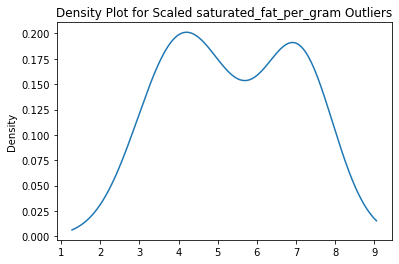

In [ ]:
#Select outliers
nutrition_outliers = nutrition.query('(scaled_saturated_fat_per_gram > 3 | scaled_saturated_fat_per_gram < -3)')['scaled_saturated_fat_per_gram']

#Create density plot for saturated_fat_per_gram
nutrition_outliers.plot.density()
plt.title('Density Plot for Scaled saturated_fat_per_gram Outliers')
plt.show()

Are there any missing values? If so, impute as necessary and explain your approach. 

In [ ]:
#Check for missing values

nutrition.isnull().values.any()


False

Standardize (zero mean) the numeric variables, and determine if there are any outliers. 


In [ ]:
#Standardize weight_in_grams
from scipy import stats
import matplotlib.pyplot as plt

nutrition['scaled_weight'] = stats.zscore(nutrition.weight_in_grams, nan_policy='omit')

nutrition['scaled_weight'].describe()

count    9.610000e+02
mean     1.045527e-16
std      1.000521e+00
min     -8.475215e-01
25%     -6.677899e-01
50%     -2.070858e-01
75%      3.901234e-01
max      7.920646e+00
Name: scaled_weight, dtype: float64

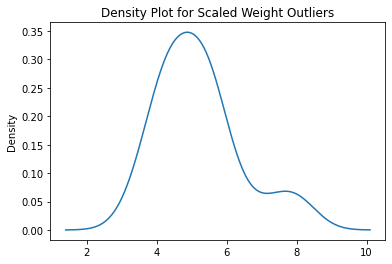

In [ ]:
#Check outliers for weight_in_grams using the three sigma rule
nutrition_weight_outliers = nutrition.query('(scaled_weight > 3 | scaled_weight < -3)')['scaled_weight']

nutrition_weight_outliers.plot.density()
plt.title('Density Plot for Scaled Weight Outliers')
plt.show()

In [ ]:
#Standardize cholesterol
from scipy import stats
import matplotlib.pyplot as plt

nutrition['scaled_cholesterol'] = stats.zscore(nutrition.cholesterol, nan_policy='omit')

nutrition['scaled_cholesterol'].describe()

count    9.610000e+02
mean    -6.330928e-16
std      1.000521e+00
min     -2.715103e-01
25%     -2.715103e-01
50%     -2.715103e-01
75%     -1.047021e-01
max      1.685135e+01
Name: scaled_cholesterol, dtype: float64

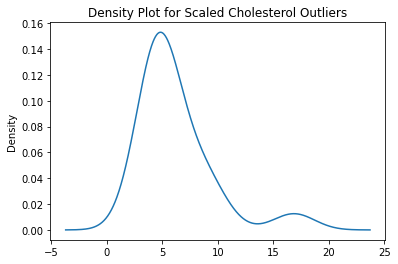

In [ ]:
#Check outliers for cholesterol using the three sigma rule
nutrition_cholesterol_outliers = nutrition.query('(scaled_cholesterol > 3 | scaled_cholesterol < -3)')['scaled_cholesterol']

nutrition_cholesterol_outliers.plot.density()
plt.title('Density Plot for Scaled Cholesterol Outliers')
plt.show()

Cheesecake and vanilla ice cream have the highest counts of saturated fat. Butter has the highest saturated fat per gram. There are no missing values in the data frame.